In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Ael
[nltk_data]     Cee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
data = pd.read_csv('IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [27]:



from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_review(review):
    # Clean
    text = re.sub(r'<.*?>|http\S+|[^\w\s]', '', review.lower())
    # Fix contractions
    text = contractions.fix(text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    return ' '.join(tokens)

data['review'] = data['review'].apply(clean_review)

[nltk_data] Downloading package punkt to C:\Users\Ael
[nltk_data]     Cee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Ael
[nltk_data]     Cee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ael
[nltk_data]     Cee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ael
[nltk_data]     Cee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
data['review']

0        one reviewers mention watch 1 oz episode hook ...
1        wonderful little production film technique una...
2        think wonderful way spend time hot summer week...
3        basically family little boy jake think zombie ...
4        petter matteis love time money visually stun f...
                               ...                        
49995    think movie right good job creative original f...
49996    bad plot bad dialogue bad act idiotic direct a...
49997    catholic teach parochial elementary school nun...
49998    go disagree previous comment side maltin one s...
49999    one expect star trek movies high art fan expec...
Name: review, Length: 50000, dtype: object

Now that your dataset is cleaned, the typical next steps in a sentiment analysis notebook are:

1. **Exploratory Data Analysis (EDA):**
    - Visualize the distribution of sentiments.
    - Check review lengths, word clouds, or most common words.

2. **Feature Extraction:**
    - Convert text data into numerical features using methods like Bag of Words, TF-IDF, or word embeddings.

3. **Model Building:**
    - Split your data into training and test sets.
    - Train a machine learning model (e.g., Logistic Regression, Naive Bayes, SVM) on the features.
    - Evaluate the model's performance.

4. **Result Analysis:**
    - Show confusion matrix, accuracy, precision, recall, F1-score.
    - Analyze misclassified examples.

Would you like to proceed with EDA, feature extraction, or model building? Let me know your preference!

In [29]:
# Example: 'positive' → 1, 'negative' → 0
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

In [8]:
print(data['sentiment'].value_counts())

sentiment
1    25000
0    25000
Name: count, dtype: int64


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(data['review'])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=100)

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_prior': [True, False]
}

# Set up GridSearchCV for MultinomialNB
nb_grid = GridSearchCV(
    MultinomialNB(),
    param_grid_nb,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)
nb_grid.fit(X_train, y_train)

# Evaluate on test set
nb_best_model = nb_grid.best_estimator_
nb_test_accuracy = nb_best_model.score(X_test, y_test)
print("Best Params:", nb_grid.best_params_)
print("Test Accuracy:", nb_test_accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'alpha': 2.0, 'fit_prior': False}
Test Accuracy: 0.8652


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [1000, 2000, 3000]
}

grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=1,  # Use serial processing to avoid pickling issues in Jupyter
    verbose=2
)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Best Params:", grid.best_params_)
print("Test Accuracy:", test_accuracy)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   0.8s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   1.1s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2, solver=saga; total time=   1.0s
[CV] END C=0.1, class_weight=None, max_iter=2000, penalty=l2, solver=libl

In [34]:
# ...existing code...
import joblib

# Save the best Logistic Regression model and its best parameters
joblib.dump(best_model, 'logistic_regression_best.pkl')
joblib.dump(grid.best_params_, 'logistic_regression_best_params.pkl')
# ...existing code...

['logistic_regression_best_params.pkl']

In [13]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


model = LinearSVC(
    class_weight='balanced', 
    dual=False,             
    random_state=42,         
    max_iter=1000           
)
model.fit(X_train, y_train)  

,penalty,'l2'
,loss,'squared_hinge'
,dual,False
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:


from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1)  # For imbalance
)
model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [64]:
from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

,C,1.0
,fit_intercept,True
,max_iter,1000
,tol,0.001
,early_stopping,False
,validation_fraction,0.1
,n_iter_no_change,5
,shuffle,True
,verbose,0
,loss,'hinge'
,n_jobs,None


In [65]:
import joblib

# Save the model and vectorizer
joblib.dump(model, 'passive_aggressive.pkl')  # Unique name to distinguish from future models
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')  # Ensure you have this from earlier

['tfidf_vectorizer.pkl']

In [ ]:
import numpy as np

y_pred = model.predict(X_test)  # Predicted labels (0/1)
# Use decision_function and apply sigmoid to get probabilities
decision_scores = model.decision_function(X_test)
y_pred_proba = 1 / (1 + np.exp(-decision_scores))  # Sigmoid

AttributeError: 'PassiveAggressiveClassifier' object has no attribute 'predict_proba'

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Classification Report (Precision, Recall, F1, Accuracy)
print(classification_report(y_test, y_pred))

# Confusion Matrix (True Negatives, False Positives, etc.)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC Score (Model's ranking ability)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4961
           1       0.87      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Confusion Matrix:
 [[4318  643]
 [ 726 4313]]
ROC-AUC Score: 0.9191240195053467


In [68]:
import pandas as pd

# Get feature names (words) and their coefficients
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]

# Create a DataFrame of words and their impact
word_importance = pd.DataFrame({"word": feature_names, "coef": coefs})
word_importance = word_importance.sort_values("coef", ascending=False)

# Top 10 positive/negative words
print("Top Positive Words:\n", word_importance.head(10))
print("\nTop Negative Words:\n", word_importance.tail(10))

Top Positive Words:
                   word       coef
63                 710  22.960867
66                 810  16.707674
4838        well worth  11.764587
3653           refresh  10.074682
3299         perfectly   8.006363
2100  highly recommend   7.621421
1716          flawless   7.609192
3140        one better   7.535445
4279            subtle   7.302532
3573              rare   7.278423

Top Negative Words:
                  word       coef
4678      unwatchable  -9.573557
4658  unintentionally  -9.689389
2611            lousy  -9.829805
1179   disappointment  -9.859603
3176        one worst -10.062615
1749      forgettable -10.621296
4210          stinker -10.950579
2955            mst3k -12.471011
49                310 -13.289187
55                410 -21.080404


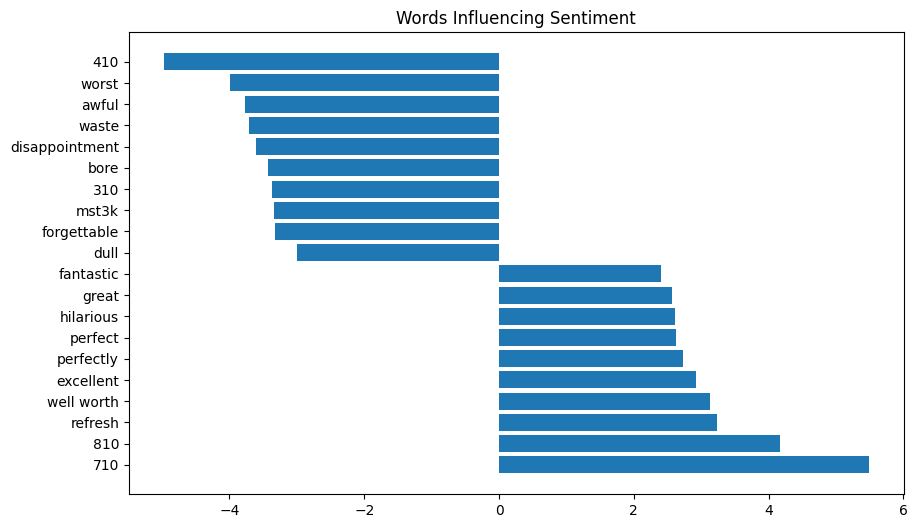

In [62]:
import matplotlib.pyplot as plt

# Plot top 20 influential words
top_words = pd.concat([word_importance.head(10), word_importance.tail(10)])
plt.figure(figsize=(10, 6))
plt.barh(top_words["word"], top_words["coef"])
plt.title("Words Influencing Sentiment")
plt.show()

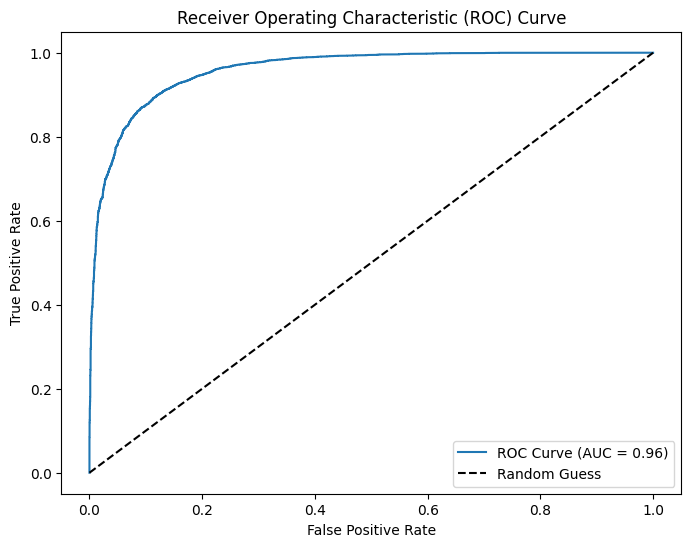

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [34]:
import joblib

# Save the Logistic Regression model
joblib.dump(model, 'logistic_regression.pkl') 


joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
from sklearn.metrics import accuracy_score

# Print accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8631


In [1]:
import joblib


logistic_regression_model = joblib.load('logistic_regression.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

In [2]:
y_pred = logistic_regression_model.predict(X_test)

NameError: name 'X_test' is not defined